# Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [115]:
#데이터가져오기
Product = pd.read_csv("C:/Users/lsh93/Desktop/data/Product.csv")
Search1 = pd.read_csv("C:/Users/lsh93/Desktop/data/Search1.csv")
Search2 = pd.read_csv("C:/Users/lsh93/Desktop/data/Search2.csv")
Custom = pd.read_csv("C:/Users/lsh93/Desktop/data/Custom.csv")
Session = pd.read_csv("C:/Users/lsh93/Desktop/data/Session.csv")
Master = pd.read_csv("C:/Users/lsh93/Desktop/data/Master.csv")

# 1. Custom_Product_Master 
# 성별 기준으로 구매한 상품 브랜드의 트렌드

In [134]:
#Data Inner Join
Product_Master = pd.merge(Product,Master)

In [135]:
Product_Master.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
1,4350334,2023661,77,642112,색상:엔젤 / 1개,바비브라운,"39,000",1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
2,5172356,4714565,47,642112,색상:카바나,[바비브라운],"39,000",1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
3,5444959,6843465,24,642112,색상:워터멜론 / 1개,바비브라운,"39,000",1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
4,5461276,7896792,53,642112,색상:워터멜론 / 1개,바비브라운,"39,000",1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터


In [136]:
Custom_Product_Master = pd.merge(Custom, Product_Master)

In [137]:
Custom_Product_Master.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,4830726,F,30,2546785,45,357970,1개,에스까다(선글라스),"130,000",1,SES937G 531X SES937,패션잡화,안경/선글라스,안경테
1,4830726,F,30,2546785,27,357970,1개,에스까다(선글라스),"130,000",1,SES937G 531X SES937,패션잡화,안경/선글라스,안경테
2,4830874,F,40,1456881,35,81976,색상:버건디(90)|사이즈:S(90/66) / 1개,유닛,"69,000",1,[UFC4-KT42N]캐시미어100프로 기본 터틀넥 니트 스웨터 - L/블루(15)...,여성의류,여성의류상의,여성스웨터/풀오버
3,4830874,F,40,1456881,35,81976,색상:아이보리(41)|사이즈:S(90/66) / 1개,유닛,"69,000",1,[UFC4-KT42N]캐시미어100프로 기본 터틀넥 니트 스웨터 - L/블루(15)...,여성의류,여성의류상의,여성스웨터/풀오버
4,4830874,F,40,1456881,35,81976,색상:D/그린(04)|사이즈:S(90/66) / 1개,유닛,"69,000",1,[UFC4-KT42N]캐시미어100프로 기본 터틀넥 니트 스웨터 - L/블루(15)...,여성의류,여성의류상의,여성스웨터/풀오버


In [138]:
#데이터 병합하기 
Custom_Product_Master = pd.merge(Custom,Product_Master)

In [12]:
Custom_Product_Master[100:]

,CLNT_ID,CLNT_GENDER,CLNT_AGE,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
100,4839353,F,30,5814936,27,512300,선택:옴니360쿨에어_펄그레이 / 1개,에르고베이비,"280,000",1,[빠른배송] 신생아아기띠 옴니360쿨에어_펄그레이 - 옴니360쿨에어_펄그레이,출산/육아용품,유아발육용품,아기띠/캐리어
101,4839353,F,30,3341607,14,507156,1개,비박스,"16,500",1,빨대컵 교체용 리필빨대 3개,출산/육아용품,수유/이유용품,이유식용품
102,4839427,F,30,6874315,35,1955,1개,정관장,"100,000",1,홍이장군2단계(20mlx30포/5세-7세)/롯데 본점,음료,기능성음료,한방음료
103,4839427,F,30,9222022,30,583553,2개,정관장.,"75,000",2,○홍삼정진(進) 에브리타임 10mx30포 + 쇼핑백 증정,건강식품,홍삼/인삼가공식품,홍삼/인삼혼합세트
104,4839489,F,40,2842534,121,66329,색상:아이보리|사이즈:XS / 1개,게스(진),"10,000",1,여성 박스로고 M2M(YF0K8455) - 블랙 / S,남성의류,남성의류상의,남성티셔츠
105,4839489,F,40,2842534,121,686712,색상:화이트|사이즈:XS / 1개,게스(진),"11,900",1,여성 박스 GUESS 발포 반팔티(YG2K9408) - 멜란지그레이 / XS,남성의류,남성의류상의,남성티셔츠
106,4839489,F,40,2842534,121,639675,색상:레드|사이즈:XS / 1개,게스(진),"19,000",1,여성 3D 엠보 ▽ M2M(YF0K9453) - 차콜그레이 / S,남성의류,남성의류상의,남성티셔츠
107,4839742,F,30,10461815,28,658169,2개,세이어스,"10,930",2,로즈페탈 위치하젤 토너 355ml,화장품/뷰티케어,스킨케어,스킨/토너
108,4839742,F,30,10265791,29,1801,4개,생각투자,"16,660",4,"바나나그램스 (신개념 스크래블, 알파벳 타일)",완구,교육완구,보드게임
109,4839795,F,40,849458,64,764067,1개,루치펠로,"39,900",1,치약 3종 세트 X 2EA (쇼핑백 2개 증정),퍼스널케어,구강케어,치약/칫솔세트


In [48]:
#Femaie
Custom_Product_Master['CLNT_GENDER'] == 'F'

0           True
1           True
2           True
3           True
4           True
5           True
6           True
7           True
8           True
9           True
10          True
11          True
12          True
13          True
14          True
15          True
16          True
17          True
18          True
19          True
20          True
21          True
22          True
23          True
24          True
25          True
26          True
27          True
28          True
29          True
           ...  
3988557     True
3988558     True
3988559     True
3988560     True
3988561     True
3988562     True
3988563     True
3988564     True
3988565     True
3988566     True
3988567     True
3988568     True
3988569     True
3988570     True
3988571     True
3988572     True
3988573    False
3988574    False
3988575     True
3988576     True
3988577     True
3988578     True
3988579     True
3988580     True
3988581    False
3988582    False
3988583    False
3988584    Fal

In [39]:
Custom_Product_Master.shape

(3988587, 14)

In [73]:
CPM_F = Custom_Product_Master[Custom_Product_Master['CLNT_GENDER'] == 'F']
CPM_F.shape

(3491522, 14)

In [85]:
CPM_F = CPM_F[['CLAC1_NM']]

In [116]:
CPM_F.head()

,CLAC1_NM
0,패션잡화
1,패션잡화
2,여성의류
3,여성의류
4,여성의류


In [120]:
CPM_F.iloc[:, 0].value_counts()

여성의류          520796
화장품/뷰티케어      424984
스포츠패션         355186
패션잡화          333476
남성의류          311051
속옷/양말/홈웨어     297714
유아동의류         261288
출산/육아용품       109535
시즌스포츠         109186
퍼스널케어          94668
건강식품           81084
원예/애완          67074
침구/수예          55428
식기/조리기구        54500
완구             38669
주방잡화           34232
문구/사무용품        33230
음료             32971
세제/위생          30697
청소/세탁/욕실용품     30535
가구             28424
생활/주방가전        27900
아웃도어/레저        26200
구기/필드스포츠       19469
헬스/피트니스        18668
모바일            15727
과일             15003
컴퓨터            10520
냉장식품            9282
계절가전            8962
냉동식품            8678
상품권             8064
축산물             6129
인테리어/조명         5025
냉장/세탁가전         3864
영상/음향가전         2749
자동차용품            554
Name: CLAC1_NM, dtype: int64


*  CLAC1_NM


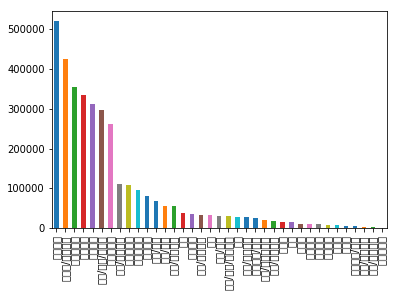

In [113]:
#Female(여성)의 상품 대분류 별 구매
for column_idx in range(1) :
    print('\n* ', CPM_F.dtypes.index[column_idx])
    CPM_F.iloc[:, column_idx].value_counts().plot.bar()
    plt.show() 

In [125]:
#Male
CPM_M = Custom_Product_Master[Custom_Product_Master['CLNT_GENDER'] == 'M']
CPM_M = CPM_M[['CLAC1_NM']]

In [128]:
CPM_M.iloc[:, 0].value_counts()

남성의류          100356
스포츠패션          88931
패션잡화           38844
화장품/뷰티케어       36702
속옷/양말/홈웨어      33375
여성의류           26710
유아동의류          21355
건강식품           14110
시즌스포츠          13292
출산/육아용품        11419
퍼스널케어          10876
아웃도어/레저         8778
원예/애완           7987
완구              6689
구기/필드스포츠        6244
음료              6009
침구/수예           5805
식기/조리기구         5589
가구              5566
문구/사무용품         5334
생활/주방가전         5057
모바일             4897
컴퓨터             4510
청소/세탁/욕실용품      4314
세제/위생           4301
주방잡화            3820
과일              2789
상품권             2260
계절가전            1833
헬스/피트니스         1823
냉장식품            1524
냉동식품            1504
축산물             1446
영상/음향가전         1038
냉장/세탁가전          970
인테리어/조명          583
자동차용품            425
Name: CLAC1_NM, dtype: int64


*  CLAC1_NM


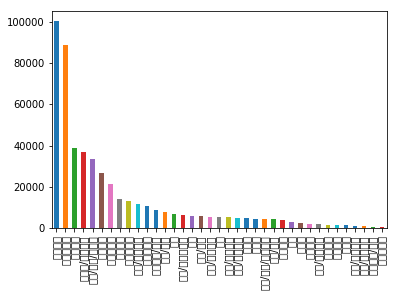

In [124]:
#Male(남성)의 상품 대분류 별 구매
for column_idx in range(1) :
    print('\n* ', CPM_M.dtypes.index[column_idx])
    CPM_M.iloc[:, column_idx].value_counts().plot.bar()
    plt.show()

# 2. 연령대 별로 구매한 상품 대분류 트렌드

In [132]:
CPM_AGE = Custom_Product_Master[['CLNT_AGE','CLAC1_NM']]